<a href="https://colab.research.google.com/github/JorgeCandido/ImersaoDados/blob/main/ImersaoDados_Aula01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np 

In [3]:
fonte = 'https://github.com/alura-cursos/imersao-dados-2-2020/blob/ddff4f29df0d6470dd59910553899e549d0b5806/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true'
dados = pd.read_csv(fonte)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


In [5]:
#filtro efetuado na tabela para pegar somente Municipio do Rio de Janeiro
rj = dados.query('NO_MUNICIPIO_RESIDENCIA == "Rio de Janeiro"')
rj.shape

(3453, 136)

In [9]:
#visualizar apenas as colunas desejadas
rj[["NO_MUNICIPIO_RESIDENCIA", "SG_UF_RESIDENCIA", "TP_SEXO", "NU_NOTA_REDACAO" ]]

,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,TP_SEXO,NU_NOTA_REDACAO
11354,Rio de Janeiro,RJ,M,700.0
12837,Rio de Janeiro,RJ,M,360.0
12840,Rio de Janeiro,RJ,F,780.0
12842,Rio de Janeiro,RJ,F,920.0
12845,Rio de Janeiro,RJ,M,700.0
...,...,...,...,...
127114,Rio de Janeiro,RJ,F,NaN
127200,Rio de Janeiro,RJ,F,540.0
127331,Rio de Janeiro,RJ,F,780.0
127332,Rio de Janeiro,RJ,F,620.0


In [10]:
#Obter a quantidade da coluna "idade"
rj['NU_IDADE'].value_counts()

18    610
19    457
17    447
20    291
21    213
16    169
22    157
24    111
23    110
25     78
26     66
27     56
31     54
30     49
28     44
32     38
29     37
34     36
37     30
15     30
36     28
33     28
38     23
35     21
40     19
49     19
42     18
45     18
41     17
48     15
43     14
44     13
39     12
55     11
52     11
53     10
46      8
63      8
54      8
56      8
51      8
50      6
47      6
57      6
62      5
61      5
59      5
60      4
58      3
65      3
69      2
64      2
66      2
67      2
68      1
72      1
Name: NU_IDADE, dtype: int64

In [11]:
#obter a quantidade de idades e classificar da menor idade para a maior
rj['NU_IDADE'].value_counts().sort_index()

15     30
16    169
17    447
18    610
19    457
20    291
21    213
22    157
23    110
24    111
25     78
26     66
27     56
28     44
29     37
30     49
31     54
32     38
33     28
34     36
35     21
36     28
37     30
38     23
39     12
40     19
41     17
42     18
43     14
44     13
45     18
46      8
47      6
48     15
49     19
50      6
51      8
52     11
53     10
54      8
55     11
56      8
57      6
58      3
59      5
60      4
61      5
62      5
63      8
64      2
65      3
66      2
67      2
68      1
69      2
72      1
Name: NU_IDADE, dtype: int64

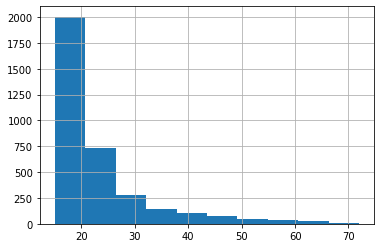

In [12]:
#Plotar um histograma para uma melhor visualização
rj['NU_IDADE'].hist()


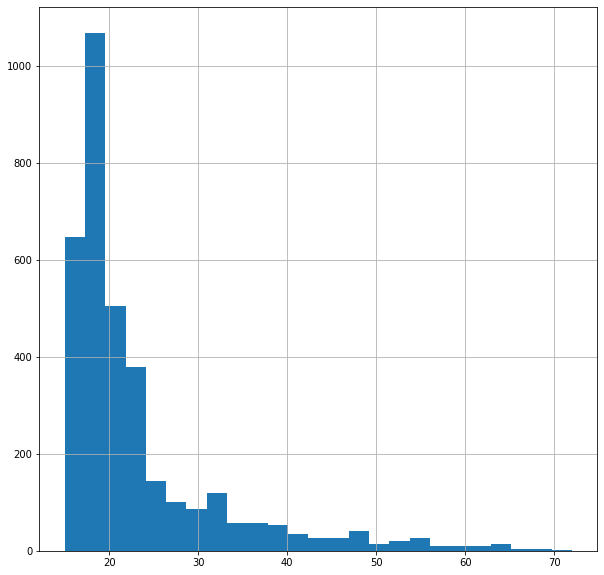

In [17]:
#Ao usar o método "bins" é possível dividir ainda  mais o histograma, obtendo assim uma visualização ainda melhor
#comando 'figsize' altera o tamanho da figura
rj['NU_IDADE'].hist(bins=25, figsize = (10,10) )

In [20]:
#Análise dos treineiros
  #Query para filtrar e utilizado o 'value_counts' para contar quantos são treineiros por idade
rj.query("IN_TREINEIRO == 1")["NU_IDADE"].value_counts().sort_index()

15     28
16    159
17    148
18     30
19      7
20      2
24      1
28      1
34      1
Name: NU_IDADE, dtype: int64

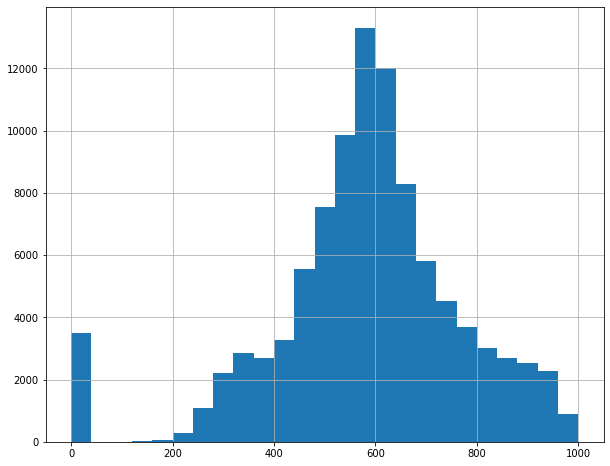

In [21]:
#Notas da redação a nível Brasil
dados['NU_NOTA_REDACAO'].hist(bins=25, figsize = (10,8) )

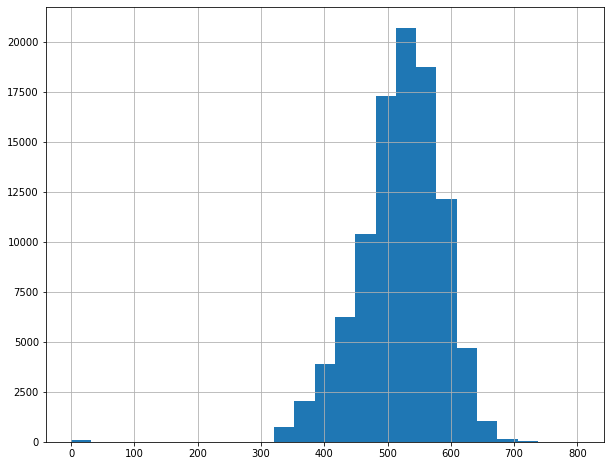

In [22]:
#Notas de Linguagens e Códigos 
dados['NU_NOTA_LC'].hist(bins=25, figsize = (10,8) )

In [23]:
dados['NU_NOTA_REDACAO'].mean()

571.5700253970197

In [24]:
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]

#Através do método 'describe' conseguimos obter dados estatisticos sobre as variáveis
dados[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,92758.000000,98043.000000,92758.000000,98043.000000,98043.000000
mean,477.964015,507.365912,523.555206,520.463928,571.570025
std,76.296099,82.972839,109.416939,64.556578,188.076455
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,418.000000,447.900000,435.300000,483.700000,480.000000
50%,470.200000,510.900000,501.600000,526.100000,580.000000
75%,533.300000,567.100000,598.200000,565.100000,680.000000
max,797.300000,809.400000,985.000000,801.700000,1000.000000


In [26]:
#Análise de qual a nota de uma porcentagem da amostra feita até aqui. 
dados['NU_NOTA_LC'].quantile(0.9999)

723.9978999999934

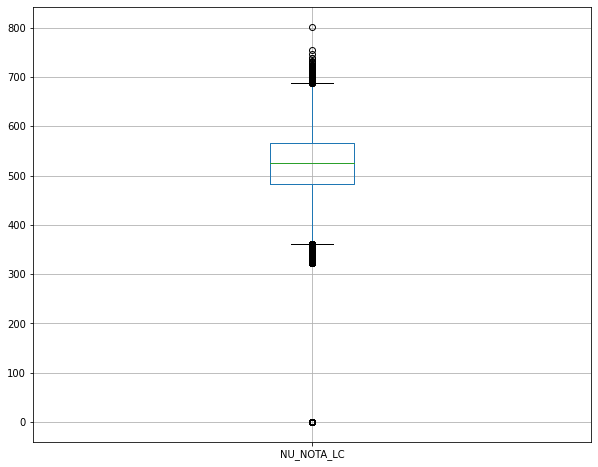

In [27]:
#Boxplot nos ajuda a ter uma visualização dos nossos dados estatisticos de uma maneira mais fácil e rápida, mas com menos detalhes.
dados['NU_NOTA_LC'].plot.box(grid = True, figsize = (10,8) )

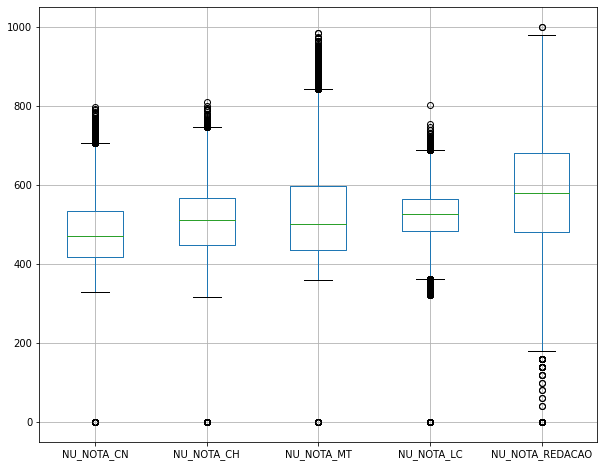

In [28]:
dados[provas].plot.box(grid = True, figsize = (10,8) )